# Importing the Libraries

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Loading the MNIST data from keras.datasets

In [178]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [179]:
type(X_train)

numpy.ndarray

In [180]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Training data = 60,000 Images**

**Test data = 10,000 Images**

Image dimension: 28 x 28

Grayscale Image : 1 channel

In [181]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [182]:
print(X_train[10].shape)

(28, 28)


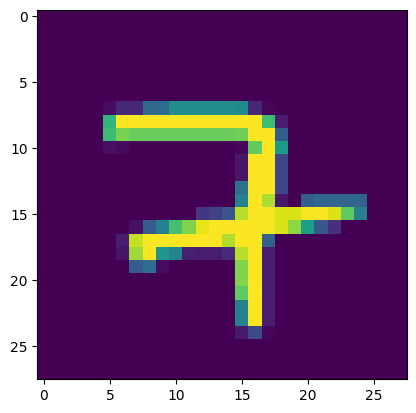

7


In [183]:
# displaying the image

plt.imshow(X_train[38])
plt.show()

# print the corresponding label
print(Y_train[38])

# Image Lables

In [184]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [185]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding.


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [186]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [187]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building the Neural Network

In [188]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [189]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [190]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8474 - loss: 0.5223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9567 - loss: 0.1455
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9679 - loss: 0.1043
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9804 - loss: 0.0656
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9843 - loss: 0.0546
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9863 - loss: 0.0474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0410
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9891 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9902 - loss: 0.0315


**Training data accuracy = 99.0%**

# Accuracy on Test data

In [191]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9603 - loss: 0.1530
0.9667999744415283


**Test data accuracy = 97.1%**

In [192]:
print(X_test.shape)

(10000, 28, 28)


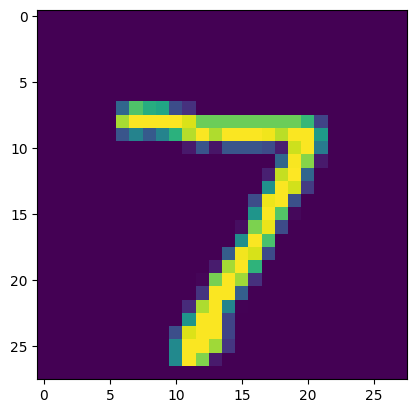

In [193]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [194]:
print(Y_test[0])

7


In [195]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [196]:
print(Y_pred.shape)

(10000, 10)


In [197]:
print(Y_pred[0])

[4.1106153e-02 8.0929603e-03 2.6693204e-02 9.3708611e-01 1.5083317e-06
 1.6491016e-04 1.0781859e-10 9.9999857e-01 6.3537464e-02 9.9973506e-01]


**model.predict() gives the prediction probability of each class for that data point**

In [198]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [199]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Y_test :  True labels**

**Y_pred_labels : Predicted Labels**

# Confusin Matrix

In [200]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [201]:
print(conf_mat)

tf.Tensor(
[[ 950    0    5    1    3    0    4    0    2   15]
 [   0 1118    1    5    0    0    6    0    5    0]
 [   4    1  993    8    5    1    4    4   11    1]
 [   0    0    3  996    0    1    0    3    2    5]
 [   0    0    3    1  966    1    6    1    1    3]
 [   4    1    0   26    1  840    8    0    9    3]
 [   3    2    0    1    6    7  931    1    6    1]
 [   0    1   11    5    2    0    1  998    0   10]
 [   1    1    3   17    2    3    2    3  938    4]
 [   0    2    0    6   44    3    1    9    7  937]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

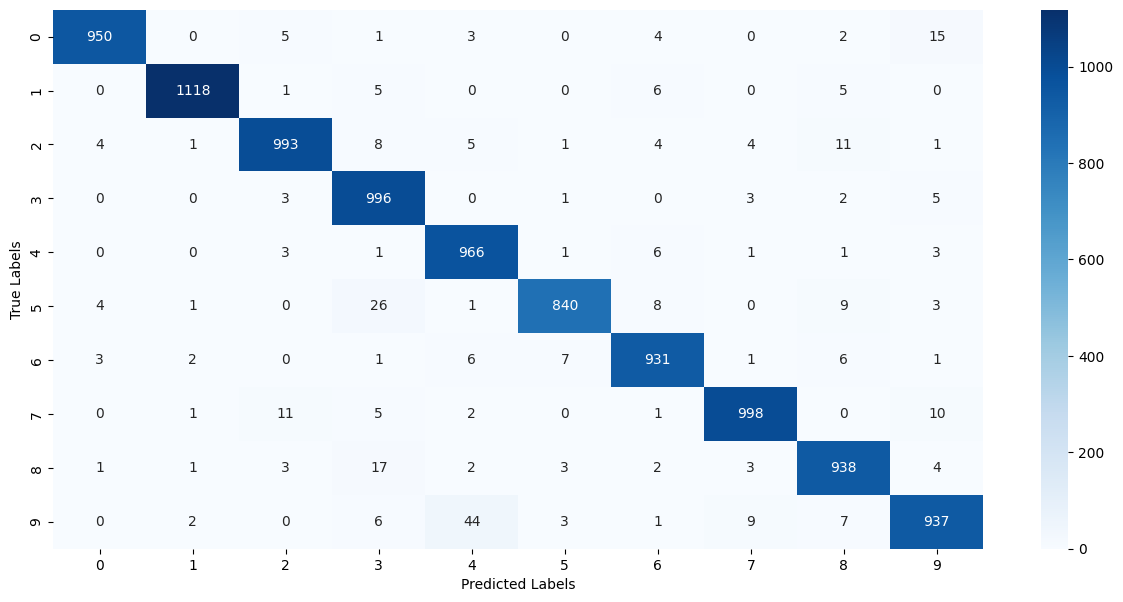

In [202]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Building a Predictive System

In [203]:
input_image_path = '/kaggle/input/digtdl/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [204]:
type(input_image)

numpy.ndarray

In [205]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


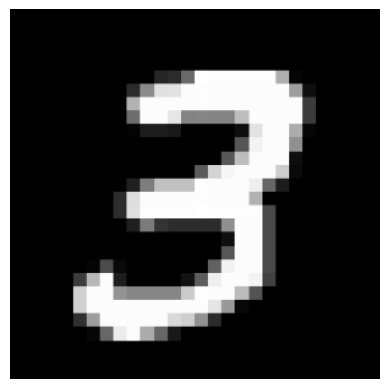

In [206]:
# Display the image
plt.imshow(input_image)
plt.axis('off')  # Hide the axis
plt.show()

In [207]:
input_image.shape

(318, 318, 3)

In [208]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [209]:
grayscale.shape

(318, 318)

In [210]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [211]:
input_image_resize.shape

(28, 28)

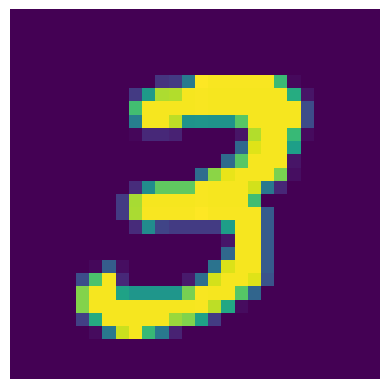

In [212]:
# Display the image
plt.imshow(input_image_resize)
plt.axis('off')  # Hide axis
plt.show()

In [213]:
input_image_resize = input_image_resize/255

In [214]:
type(input_image_resize)

numpy.ndarray

In [215]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [216]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[2.25661469e-11 4.95974608e-02 4.85274446e-04 1.00000000e+00
  1.05562586e-16 9.42158937e-01 3.96539268e-16 1.15800241e-04
  3.42087634e-03 8.34062278e-01]]


In [217]:
input_pred_label = np.argmax(input_prediction)

In [218]:
print(input_pred_label)

3


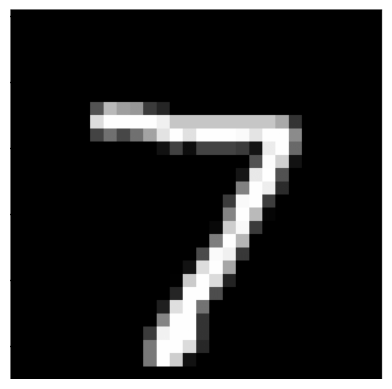

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The Handwritten Digit is recognized as 7


In [226]:
# Specify the correct path to the image
input_image_path = '/kaggle/input/12dllll/12.png'

# Read the image
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    # Convert BGR to RGB
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.show()

    # Convert to grayscale
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Resize the image
    input_image_resize = cv2.resize(grayscale, (28, 28))

    # Normalize pixel values
    input_image_resize = input_image_resize / 255

    # Reshape the image
    image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

    # Predict
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognized as', input_pred_label)


In [228]:
# Save the model in HDF5 format
model.save('model.h5')